<a href="https://colab.research.google.com/github/HuanAII/Excercise/blob/main/linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#baitap1
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, index):
    result = [row[index] for row in data]
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X, y
X , y = prepare_data ( "/content/advertising.csv")
list = [ sum ( X [0][:5]) , sum ( X [1][:5]) , sum ( X [2][:5]) , sum ( y [:5]) ]
print ( list )


[624.1, 175.10000000000002, 300.5, 78.9]


In [ ]:
def initialize_params () :
  w1 = random . gauss ( mu =0.0 , sigma =0.01)
  w2 = random . gauss ( mu =0.0 , sigma =0.01)
  w3 = random . gauss ( mu =0.0 , sigma =0.01)
  b = 0
  return w1 , w2 , w3 , b

def compute_loss_mse (y , y_hat ):
  return ( y - y_hat ) ** 2

def predict ( x1 , x2 , x3 , w1 , w2 , w3 , b ) :
  return w1 * x1 + w2 * x2 + w3 * x3 + b

def compute_gradient_wi(x , y , y_hat ) :
  return 2 * ( y_hat - y ) * x

def compute_gradient_b(y , y_hat ) :
  return 2 * ( y_hat - y)

def update_weight_wi (w , dl_dw , lr ) :
  return w - lr * dl_dw

def update_weight_b (b , dl_db , lr ) :
  return b - lr * dl_db

In [ ]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # Compute predicted output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss
            loss = compute_loss_mse(y, y_hat)

            # Compute gradients for w1, w2, w3, and bias
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Update weights and bias
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # Log loss for each iteration
            losses.append(loss)

    return w1, w2, w3, b, losses

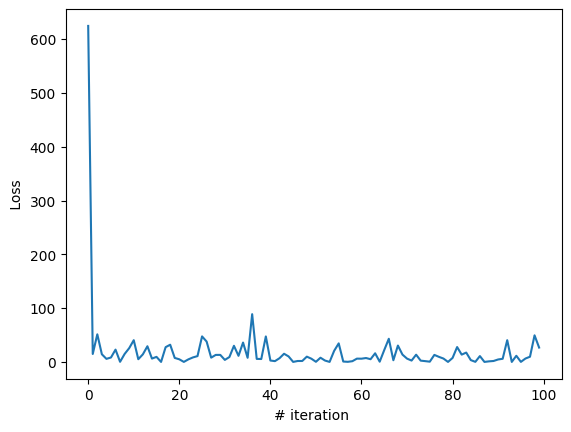

In [ ]:
X , y = prepare_data ( "/content/advertising.csv")
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression (X , y )
plt . plot ( losses [:100])
plt . xlabel ("# iteration ")
plt . ylabel (" Loss ")
plt . show ()

In [ ]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):

        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # Get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # Compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss
            loss = compute_loss_mse(y, y_hat)

            # Accumulate loss
            loss_total += loss

            # Compute gradients w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Accumulate gradients for w1, w2, w3, b
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # After processing N samples, update parameters
        w1 = update_weight_wi(w1, dw1_total / N, lr)
        w2 = update_weight_wi(w2, dw2_total / N, lr)
        w3 = update_weight_wi(w3, dw3_total / N, lr)
        b = update_weight_b(b, db_total / N, lr)

        # Log average loss per epoch
        losses.append(loss_total / N)

    return w1, w2, w3, b, losses



epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49


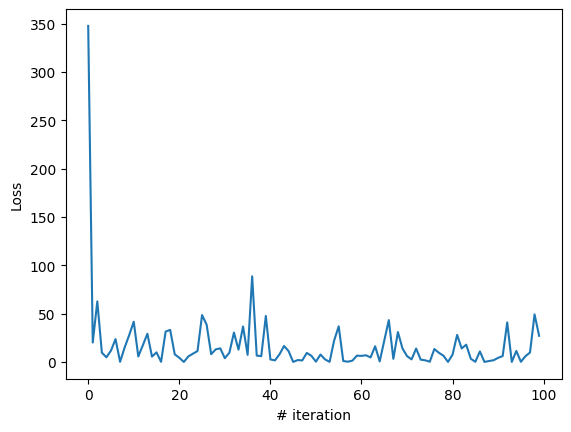

31.580633737124387


In [ ]:
#baitap4:
import numpy as np
import random
import matplotlib.pyplot as plt

# Function to extract a specific column from the dataset
def get_column(data, index):
    return [row[index] for row in data]

# Prepare data
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)

    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data

    return X, y

# Initialize random weights
def initialize_params():
    w0 = random.gauss(0.0, 0.01)
    w1 = random.gauss(0.0, 0.01)
    w2 = random.gauss(0.0, 0.01)
    w3 = random.gauss(0.0, 0.01)
    return [w0, w1, w2, w3]

# Predict the output
def predict(X_features, weights):
    return sum(w * x for w, x in zip(weights, X_features))

# Compute the loss (MSE)
def compute_loss(y_hat, y):
    return (y_hat - y) ** 2

# Compute gradient
def compute_gradient_w(X_features, y, y_hat):
    return [2 * (y_hat - y) * x for x in X_features]

# Update weights using gradient descent
def update_weight(weights, dl_dweights, lr):
    return [w - lr * dw for w, dw in zip(weights, dl_dweights)]

# Linear regression implementation
def implement_linear_regression(X_feature, y_output, epoch_max=50, lr=1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_output)

    for epoch in range(epoch_max):
        print("epoch", epoch)
        for i in range(N):
            features_i = X_feature[i]
            y = y_output[i]

            y_hat = predict(features_i, weights)
            loss = compute_loss(y, y_hat)
            dl_dweights = compute_gradient_w(features_i, y, y_hat)
            weights = update_weight(weights, dl_dweights, lr)

            losses.append(loss)

    return weights, losses

X, y = prepare_data("/content/advertising.csv")
W, L = implement_linear_regression(X, y)

plt.plot(L[:min(100, len(L))])
plt.xlabel("# iteration")
plt.ylabel("Loss")
plt.show()
print ( L[9999])
